In [2]:
import os
import glob
import torch
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

import config
import dataset
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\morris simons\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
"""To get avgtime from the data traning"""
with open ("log.txt", "r") as f:
    x = f.read()
x = [int(float(i)) for i in x.split(",") if i != ""]
avg_time = sum(x)/len(x)
print(f"how many records in log: {len(x)}")
print(f"this is avg time: {avg_time:1f}".format(round(avg_time,2)))
print(f"the amount of max combinations when brutforceing: {36**5:,}")

how many records in log: 736
this is avg time: 30.118207
the amount of max combinations when brutforceing: 60,466,176


In [4]:
image_files = glob.glob(os.path.join(config.DATA_DIR, "*.png"))
targets_orig = [x.split("/")[-1][9:14] for x in image_files]
targets = [[c for c in x] for x in targets_orig]
targets_flat = [c for clist in targets for c in clist]
lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)
targets_enc = [lbl_enc.transform(x) for x in targets]
target_enc = np.array(targets_enc) + 1
(
    train_imgs,
    test_imgs,
    train_targets,
    test_targets,
    train_orig_targets,
    test_orig_targets
    ) = model_selection.train_test_split(
    image_files,
    target_enc,
    targets_orig,
    test_size=0.1,
    random_state=42
)
train_dataset = dataset.ClassificationDataset(
    image_paths=train_imgs,
    targets=train_targets,
    resize=(config.IMAGE_HEIGHT,
            config.IMAGE_WIDTH
            ),)

In [5]:
"""To get Number of classes or unique characters from the data"""
print(len(lbl_enc.classes_))

36


In [32]:
npimg = train_dataset[20]["images"].numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


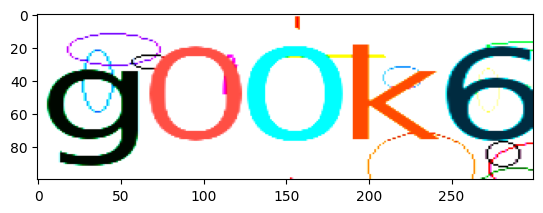

In [33]:
plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [23]:
npimg = train_dataset[7]["images"].numpy()

In [24]:
npimg.shape

(3, 100, 300)